<a href="https://colab.research.google.com/github/gkumbhare/Applinces-Energy-Consumption-Prediction-/blob/main/appliance_energy_perdiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Appliance Energy consumption prediction

##### **Project Type**    - Regression
##### **Contribution**    - Individual

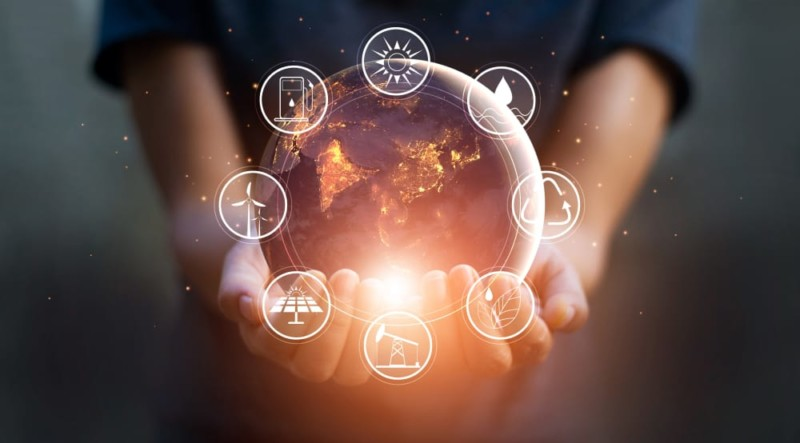

# **Project Summary -**

Appliances Energy Dataset is providing the very useful information over 29 features including the datapoints on Visibility,Atmospheric Pressure, Windspeed and Dewpoint of surrounding area. We all know the relation between the surrounding temperature and household energy consumption pattern in various regions of world.For e.g In South India the Diuranal temperature change is low and revolves around 3-4 degrees. The perinial temperature is high and hence they might require cooling equipments more fequently. Hence incresing their energy consumption. This relationship have been expressed in the Appliances Energy Dataset.
In the Project we are going to perform a EDA to deep dive into the trends hidden in the Data. In addition with it we are going to perform the Linear Regression model to predict the basic energy consumption by the Appliances. In this project we are finding the relationship between 28 features in response with one dependent variable, so that we could be more accurate while performing the Predictions.

# **GitHub Link -** https://github.com/gkumbhare/Applinces-Energy-Consumption-Prediction-.git

# **Problem Statement**


The Dataset is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network.Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes. The energy data was logged every 10 minutes with m-bus energy metres. Weather from the nearest airport weather station(Chievres Airport,Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru) and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non-predictive attributes. You need to predict the energy use of appliances.

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries# Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import warnings
import dateutil
import time
%matplotlib inline

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from scipy.stats import pearsonr
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
#avoid warnings
warnings.filterwarnings("ignore")

In [ ]:
pip install --upgrade "kaleido==0.1.*"

  Using cached kaleido-0.1.0-py2.py3-none-manylinux1_x86_64.whl (74.6 MB)
  Attempting uninstall: kaleido
    Found existing installation: kaleido 0.2.1
    Uninstalling kaleido-0.2.1:
      Successfully uninstalled kaleido-0.2.1


In [ ]:
pip install -U kaleido

  Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl (79.9 MB)
  Attempting uninstall: kaleido
    Found existing installation: kaleido 0.1.0
    Uninstalling kaleido-0.1.0:
      Successfully uninstalled kaleido-0.1.0


### Dataset Loading

In [ ]:
# mountining the google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset from the google drive
Dataset = pd.read_csv('/content/drive/MyDrive/alma project/Regression project/data_application_energy (1).csv')

### Dataset First View

In [ ]:
# Dataset First Look

Dataset.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

print(Dataset.columns) # to chaeck the columns and their names of the Dataset

print(Dataset.shape) # this code will show you the total no. rows and columns of the dataset

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')
(19735, 29)


### Dataset Information

In [ ]:
# Dataset Info

Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

print(len(Dataset[Dataset.duplicated()]))   # this code will return the duplicate values of the dataset

0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

print(Dataset.isnull().sum()) #this code will return the no. of null or missing values

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


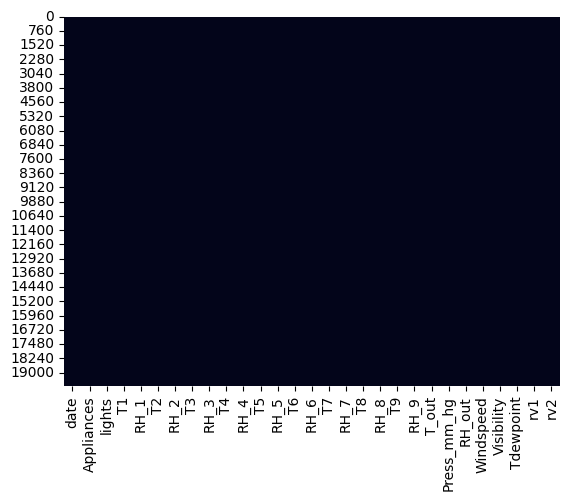

In [ ]:
# Visualizing the missing values

sns.heatmap(Dataset.isnull(), cbar=False) #this heat map will show you the data of the null values
plt.show('jpg')

### What did you know about your dataset?

There are total 29 features. Out of which 'Appliances' is our dependent variable.

There are no duplicate columns and no null values.

The datatype is mixed and not so specific.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

Dataset.columns # this code will return the names of the columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
# Dataset Describe
Dataset.describe(include = 'all') #this code describe the Dataset

date    Appliances        lights            T1  \
count                 19735  19735.000000  19735.000000  19735.000000   
unique                19735           NaN           NaN           NaN   
top     2016-01-11 17:00:00           NaN           NaN           NaN   
freq                      1           NaN           NaN           NaN   
mean                    NaN     97.694958      3.801875     21.686571   
std                     NaN    102.524891      7.935988      1.606066   
min                     NaN     10.000000      0.000000     16.790000   
25%                     NaN     50.000000      0.000000     20.760000   
50%                     NaN     60.000000      0.000000     21.600000   
75%                     NaN    100.000000      0.000000     22.600000   
max                     NaN   1080.000000     70.000000     26.260000   

                RH_1            T2          RH_2            T3          RH_3  \
count   19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       40.259739     20.341219     40.420420     22.267611     39.242500   
std         3.979299      2.192974      4.069813      2.006111      3.254576   
min        27.023333     16.100000     20.463333     17.200000     28.766667   
25%        37.333333     18.790000     37.900000     20.790000     36.900000   
50%        39.656667     20.000000     40.500000     22.100000     38.530000   
75%        43.066667     21.500000     43.260000     23.290000     41.760000   
max        63.360000     29.856667     56.026667     29.236000     50.163333   

                  T4  ...            T9          RH_9         T_out  \
count   19735.000000  ...  19735.000000  19735.000000  19735.000000   
unique           NaN  ...           NaN           NaN           NaN   
top              NaN  ...           NaN           NaN           NaN   
freq             NaN  ...           NaN           NaN           NaN   
mean       20.855335  ...     19.485828     41.552401      7.411665   
std         2.042884  ...      2.014712      4.151497      5.317409   
min        15.100000  ...     14.890000     29.166667     -5.000000   
25%        19.530000  ...     18.000000     38.500000      3.666667   
50%        20.666667  ...     19.390000     40.900000      6.916667   
75%        22.100000  ...     20.600000     44.338095     10.408333   
max        26.200000  ...     24.500000     53.326667     26.100000   

         Press_mm_hg        RH_out     Windspeed    Visibility     Tdewpoint  \
count   19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      755.522602     79.750418      4.039752     38.330834      3.760707   
std         7.399441     14.901088      2.451221     11.794719      4.194648   
min       729.300000     24.000000      0.000000      1.000000     -6.600000   
25%       750.933333     70.333333      2.000000     29.000000      0.900000   
50%       756.100000     83.666667      3.666667     40.000000      3.433333   
75%       760.933333     91.666667      5.500000     40.000000      6.566667   
max       772.300000    100.000000     14.000000     66.000000     15.500000   

                 rv1           rv2  
count   19735.000000  19735.000000  
unique           NaN           NaN  
top              NaN           NaN  
freq             NaN           NaN  
mean       24.988033     24.988033  
std        14.496634     14.496634  
min         0.005322      0.005322  
25%        12.497889     12.497889  
50%        24.897653     24.897653  
7

### Variables Description



*   T1 : Temperature in kitchen area, in Celsius

*   T2 : Temperature in living room area, in Celsius

*   T3 : Temperature in laundry room area, in Celsius

*   T4 : Temperature in office room, in Celsius

*   T5 : Temperature in bathroom, in Celsius

*   T6 : Temperature outside the building (north side), in Celsius

*   T7 : Temperature in ironing room, in Celsius

*   T8 : Temperature in teenager room 2, in Celsius

*   T9 : Temperature in parents room, in Celsius

*   RH1 : Humidity in kitchen area, in %

*   RH2 : Humidity in living room area, in %

*   RH3 : Humidity in laundry room area, in %

*   RH4 : Humidity in office room, in %

*   RH5 : Humidity in bathroom, in %

*   RH6 : Humidity in outside the building (north side), in %

*   RH7 : Humidity in ironing room, in %

*   RH8 : Humidity in teenager room 2, in %

*   RH9 : Humidity in parents room, in %

*   To : Temperature outside (from Chievres weather station), in Celsius

*   Pressure : (from Chievres weather station), in mm Hg

*   Hg RHout : Humidity outside (from Chieves weather station), in %

*   Wind speed : (from Chievres weather station), in m/s

*   Visibility : (from Chievres weather station), in km

*   Tdewpoint : (from Chievres weather station), in Å°C

*   Appliances, energy use in Wh : Dependent variable


##Feature ranges

*   Temperature range : -6 to 30 deg

*   Humidity range : 1 to 100 %

*   Windspeed range: 0 to 14 m/s

*   Visibility range: 1 to 66 km

*   Pressure range: 729 to 772 mm Hg

*   Appliance Energy Usage range: 10 to 1080 Wh
































### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

for i in Dataset.columns.tolist():
  print("No. of unique values in ",i,"is",Dataset[i].nunique(),".")

No. of unique values in  date is 19735 .
No. of unique values in  Appliances is 92 .
No. of unique values in  lights is 8 .
No. of unique values in  T1 is 722 .
No. of unique values in  RH_1 is 2547 .
No. of unique values in  T2 is 1650 .
No. of unique values in  RH_2 is 3376 .
No. of unique values in  T3 is 1426 .
No. of unique values in  RH_3 is 2618 .
No. of unique values in  T4 is 1390 .
No. of unique values in  RH_4 is 2987 .
No. of unique values in  T5 is 2263 .
No. of unique values in  RH_5 is 7571 .
No. of unique values in  T6 is 4446 .
No. of unique values in  RH_6 is 9709 .
No. of unique values in  T7 is 1955 .
No. of unique values in  RH_7 is 5891 .
No. of unique values in  T8 is 2228 .
No. of unique values in  RH_8 is 6649 .
No. of unique values in  T9 is 924 .
No. of unique values in  RH_9 is 3388 .
No. of unique values in  T_out is 1730 .
No. of unique values in  Press_mm_hg is 2189 .
No. of unique values in  RH_out is 566 .
No. of unique values in  Windspeed is 189 .
No.

## 3. ***Data Wrangling***

In [ ]:
# Write your code to make your dataset analysis ready.

#changing date column dtype as datetime type
Dataset['date'] = pd.to_datetime(Dataset['date'])
Dataset.date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 19735 entries, 0 to 19734
Series name: date
Non-Null Count  Dtype         
--------------  -----         
19735 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 154.3 KB


In [ ]:
Dataset.set_index(Dataset.date.copy(deep=True),inplace=True)

In [ ]:
#making all column_name to lower case to make unity.
Dataset.columns = [col.lower() for col in Dataset.columns]

### What all manipulations have you done and insights you found?

We didn't do much manipulations work in this dataset as this dataset is already perfect for data analysis. I doesn't have nan values to impute. I just changed the datatype of "date" variable to pandas datetime object and made it as identifier/primary key for our dataframe, as all data are unique for each observation.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

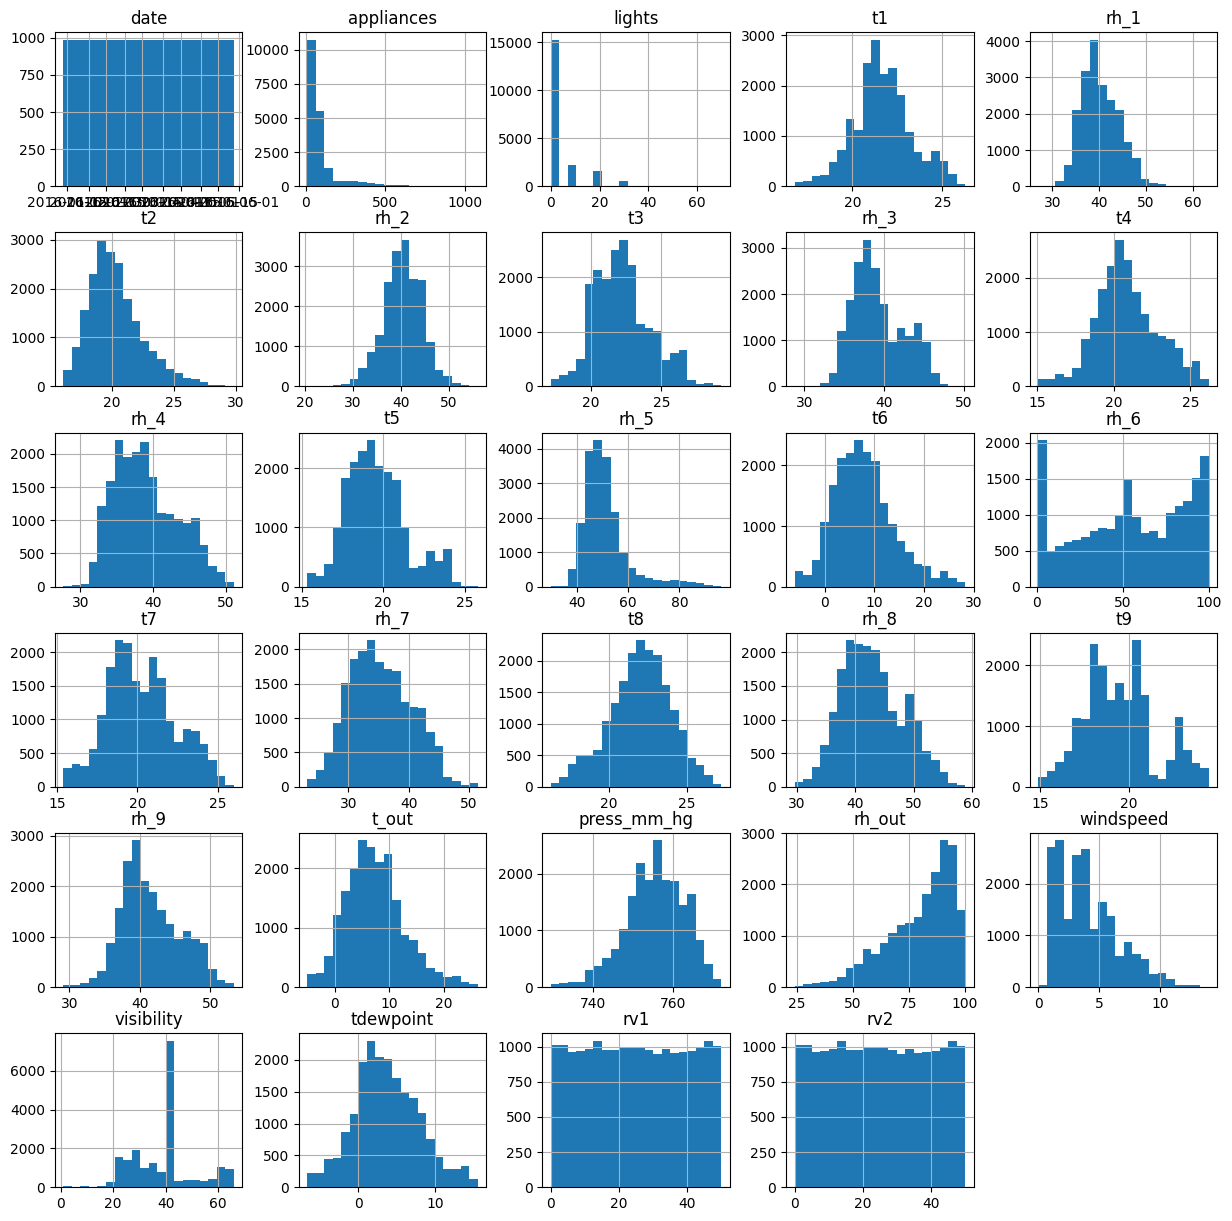

In [ ]:
Dataset.hist(bins = 20 , figsize= (15,15));
plt.show('jpg')

# Observations based on distribution plot


##### 1. Why did you pick the specific chart?

Histogram helps us to view the distribution of our data more clearly.

##### 2. What is/are the insight(s) found from the chart?

1. All humidity values except RH_6 and RH_out follow a Normal distribution.
2. Similarly, all temperature readings follow a Normal distribution except for T9.
3. Out of the remaining columns, we can see that Visibility, Windspeed and Appliances are skewed.
4. The random variables rv1 and rv2 have more or less the same values for all the recordings.
5. The output variable Appliances has most values less than 200Wh, showing that high energy consumption cases are very low.
6. No column has a distribution like the target variable Appliances.
Hence, there are no feature independent feature with a linear relationship with the target.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It doesn't have any business values

#### Chart - 2

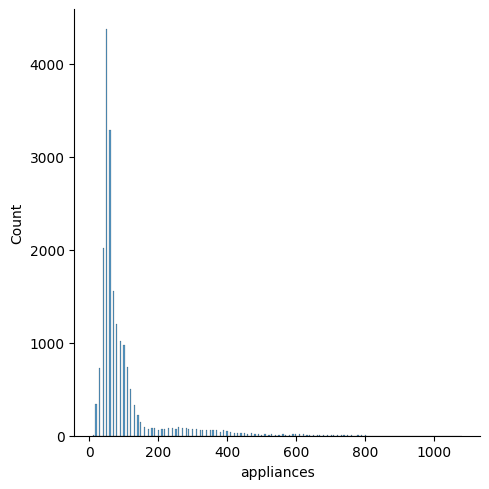

In [ ]:
# Chart - 2 visualization code
sns.displot(Dataset["appliances"])
plt.show('jpg')

##### 1. Why did you pick the specific chart?

The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution.

##### 2. What is/are the insight(s) found from the chart?

We can see that we have more data for the appliances that consumes power that ranges between 1-250.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is no business insights from the above graph as I plotted it to get insights about the data.

#### Chart - 3

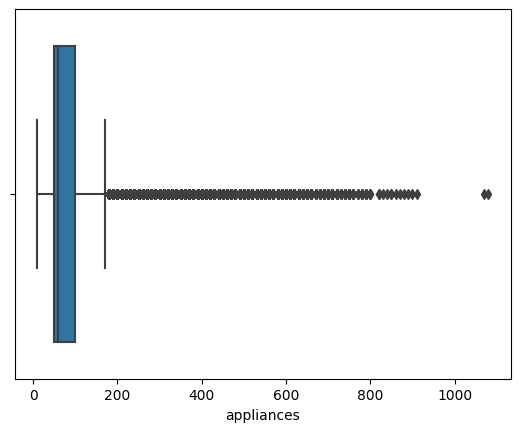

In [ ]:
# Chart - 3 visualization code

#2-Clearly there will be outliers in appliances part as it has a skew graph so we will use box plot to visualize that
sns.boxplot(x= Dataset["appliances"])
plt.show('jpg')

##### 1. Why did you pick the specific chart?

Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers., so we use the boxplot to check the skew and outliers

##### 2. What is/are the insight(s) found from the chart?

in above box plot we can see the outliers

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is no business insights from the above graph as I plotted it to get insights about the data.

#### Chart - 4

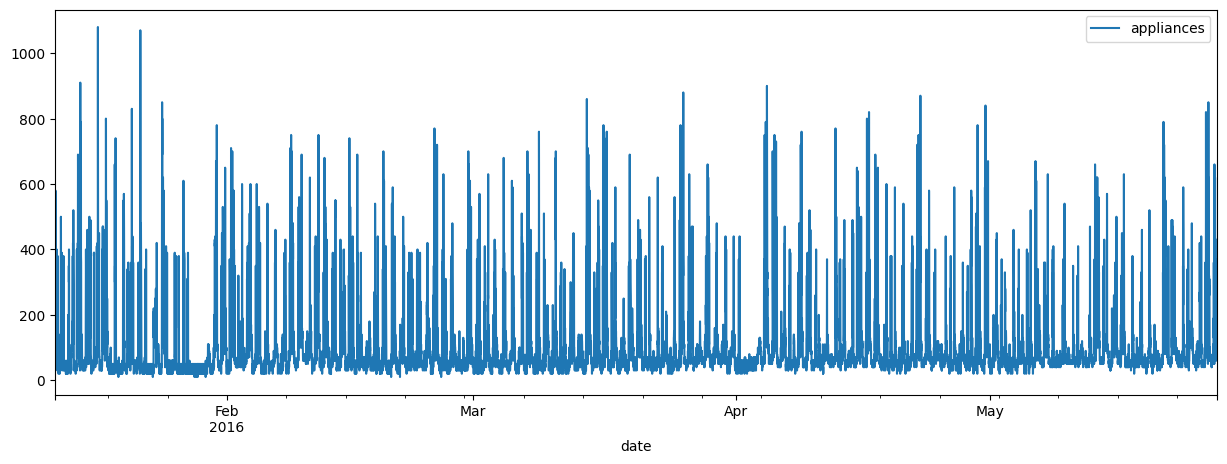

In [ ]:
# Chart - 4 visualization code

# Day wise Electricity consumption

#creating a lineplot for appliances vs Datetime
Dataset[['appliances']].plot(figsize= (15,5))
plt.show('jpg')

##### 1. Why did you pick the specific chart?

I chose line plot, because in time series it is easy to witness the trend across time easily.



##### 2. What is/are the insight(s) found from the chart?

I could see the similarity in trend in every 2 months, but could not able to confirm as we have data for only 5 months. As the chart shows it starts from January(mid) to may.

**Overall Consumption Trend:** By plotting the electricity consumption values over time, we can observe the general trend. It seems that the consumption fluctuates throughout the given period.

**Peak Consumption Days:** By identifying the highest values in the dataset, we can find the days with the highest electricity consumption. For example, there are a few instances of relatively high consumption, such as on 2016-04-04 and 2016-04-22, where the consumption values are significantly higher compared to other days.

**Fluctuations and Seasonality:** By observing the daily values, we can notice fluctuations in electricity consumption. There are periods where the consumption appears to be relatively consistent, and other periods with more significant variations.

**Potential Weekly Patterns:** Analyzing the data for any potential weekly patterns might be insightful. For example, comparing consumption values for weekdays versus weekends may reveal differences in electricity usage behavior.

**Monthly Comparisons:** Grouping the data by month and calculating average consumption for each month can provide insights into monthly variations. It may help identify months with higher or lower electricity consumption.

**Outliers:** It appears that some values in the dataset are relatively higher or lower compared to the surrounding values. These could be potential outliers, and identifying their causes may lead to additional insights.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, I think this trend which we noticed in the chart may helps us to estimate the future usage of the appliances.

#### Chart - 5

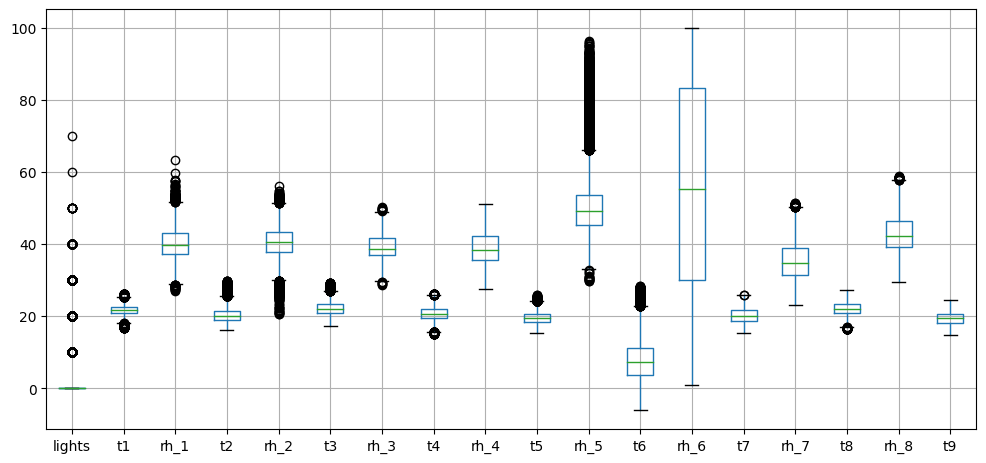

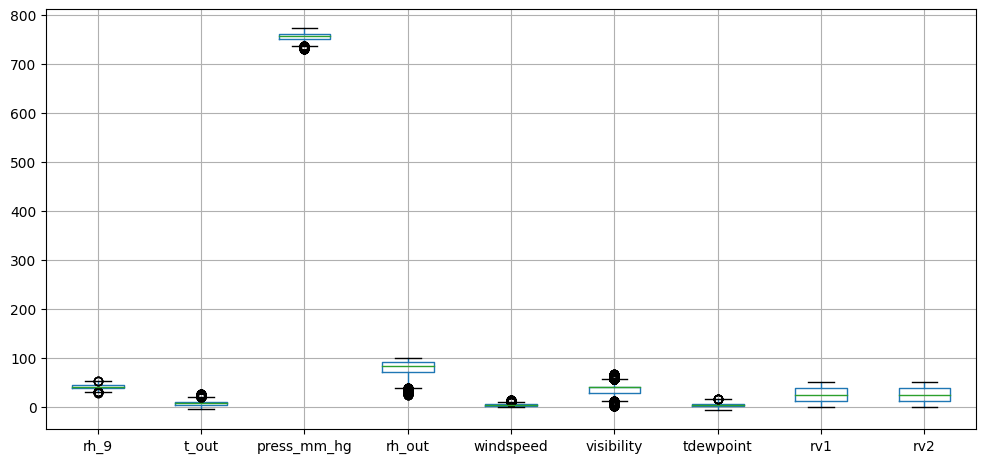

In [ ]:
# Chart - 5 visualization code

#Creating a boxplot from 2nd to 20th variable
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
Dataset.iloc[:,2:20].boxplot()
plt.show()

#creating a boxplot from 20th variable
plt.figure(figsize=(12,12))
plt.subplot(2,1,2)
Dataset.iloc[:,20:].boxplot()
plt.show('jpg')

##### 1. Why did you pick the specific chart?


*  Boxplot really helpful to view the distribution of variables along with its ranges and get some insights about outliers.



##### 2. What is/are the insight(s) found from the chart?

*   I could see first that our most of the columns is affected by outliers except few columns. And second, we can see that almost all the features is normally distributed which would be helpful in model building. And finally we could also see that rh5 and rh6 ranges from 1 to 100 compared with other rh which having its maximum value around 60.In the second plot seems like variable are less ouliers in it and looks like press_mm_hg has to be scaled.







##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   It doesn't give insights for business purpose, it is for my understanding aboutthe data.

#### Chart - 6

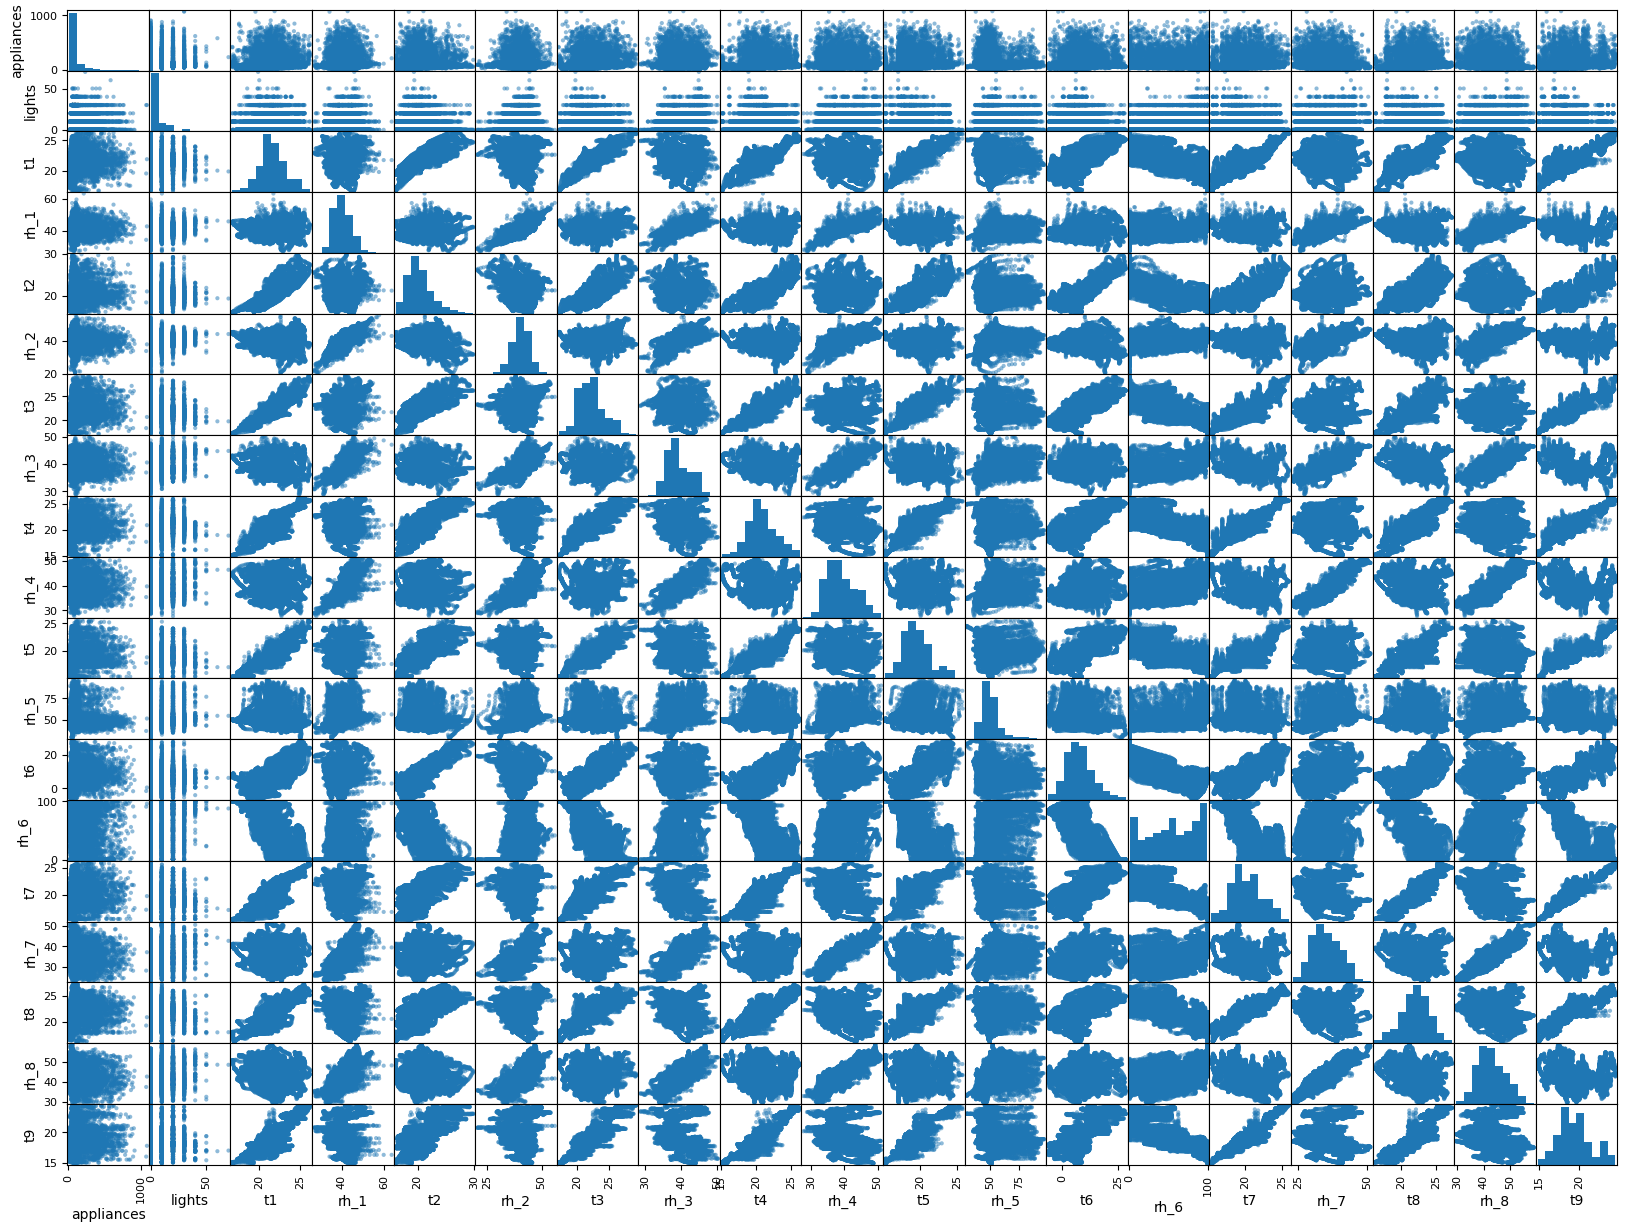

In [ ]:
# Chart - 6 visualization code
#creating a scatter plot for all variables
pd.plotting.scatter_matrix(Dataset.iloc[:,:20],figsize=(20,15))
plt.show('jpg')

##### 1. Why did you pick the specific chart?

Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers., so we use the boxplot to check the skew and outliers

##### 2. What is/are the insight(s) found from the chart?

As we can clearly see that our target variable doesn't correlation with any of the columns and its looks like lights has some categories in it. And finally we could see that every room_humidity(rh) is correlated with each other and every temperature(t) variable is correlated with each other.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If some variables are highly correlated we can remove those variable from the features and its reduces the expenses needed for collecting those variables.

#### Chart - 7

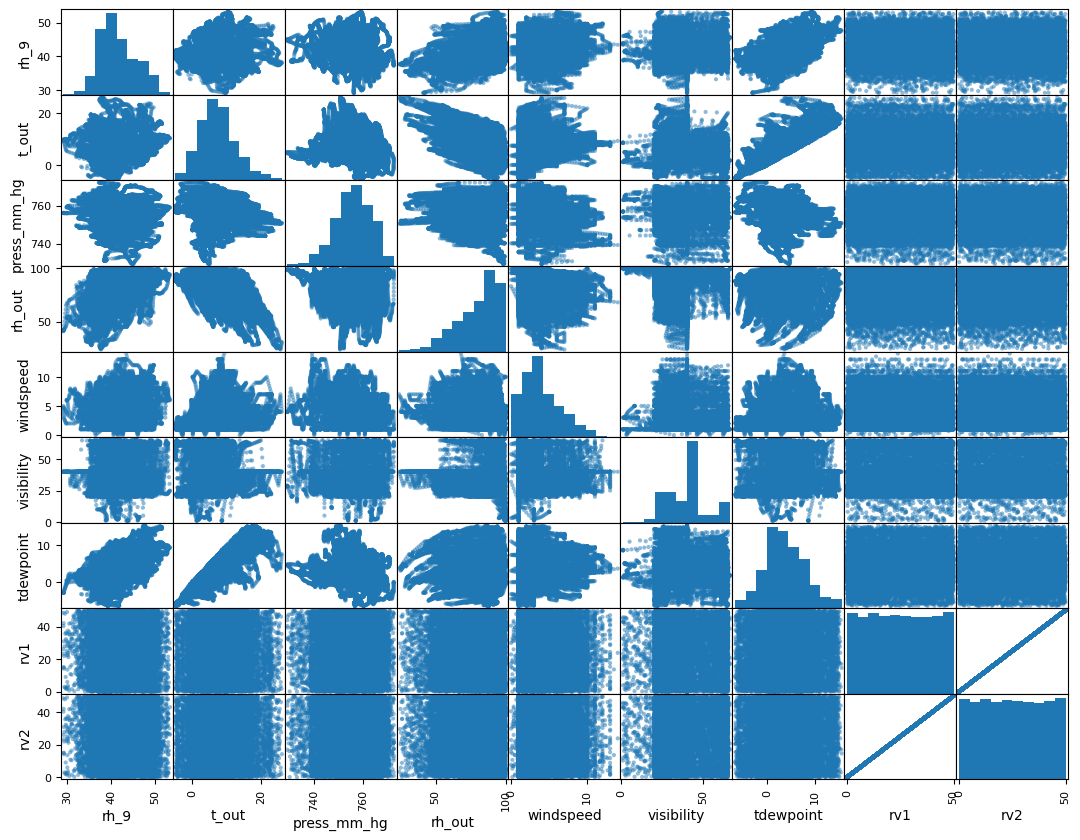

In [ ]:
#creating a scatter plot for all variables
pd.plotting.scatter_matrix(Dataset.iloc[:,20:],figsize=(13,10))
plt.show('jpg')

##### 1. Why did you pick the specific chart?

A line graph is commonly used to display change over time as a series of data points connected by straight line segments on two axes. The line graph therefore helps to determine the relationship between two sets of values, with one data set always being dependent on the other set.

##### 2. What is/are the insight(s) found from the chart?


This chart has some interesting insights in it, we can see that none of the variable are correlated with each other much which each variable giving different information about the target variable which is good. And if you see that rv1 and rv2 is highly correlated and if you see it maintains almost same distribution with other variables which means rv1 and rv2 gives the same information and dropping one of them doesn't impact in prediction.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If some variables are highly correlated we can remove those variable from the features and its reduces the expenses needed for collecting those variables.

#### Chart - 8 - Correlation Heatmap

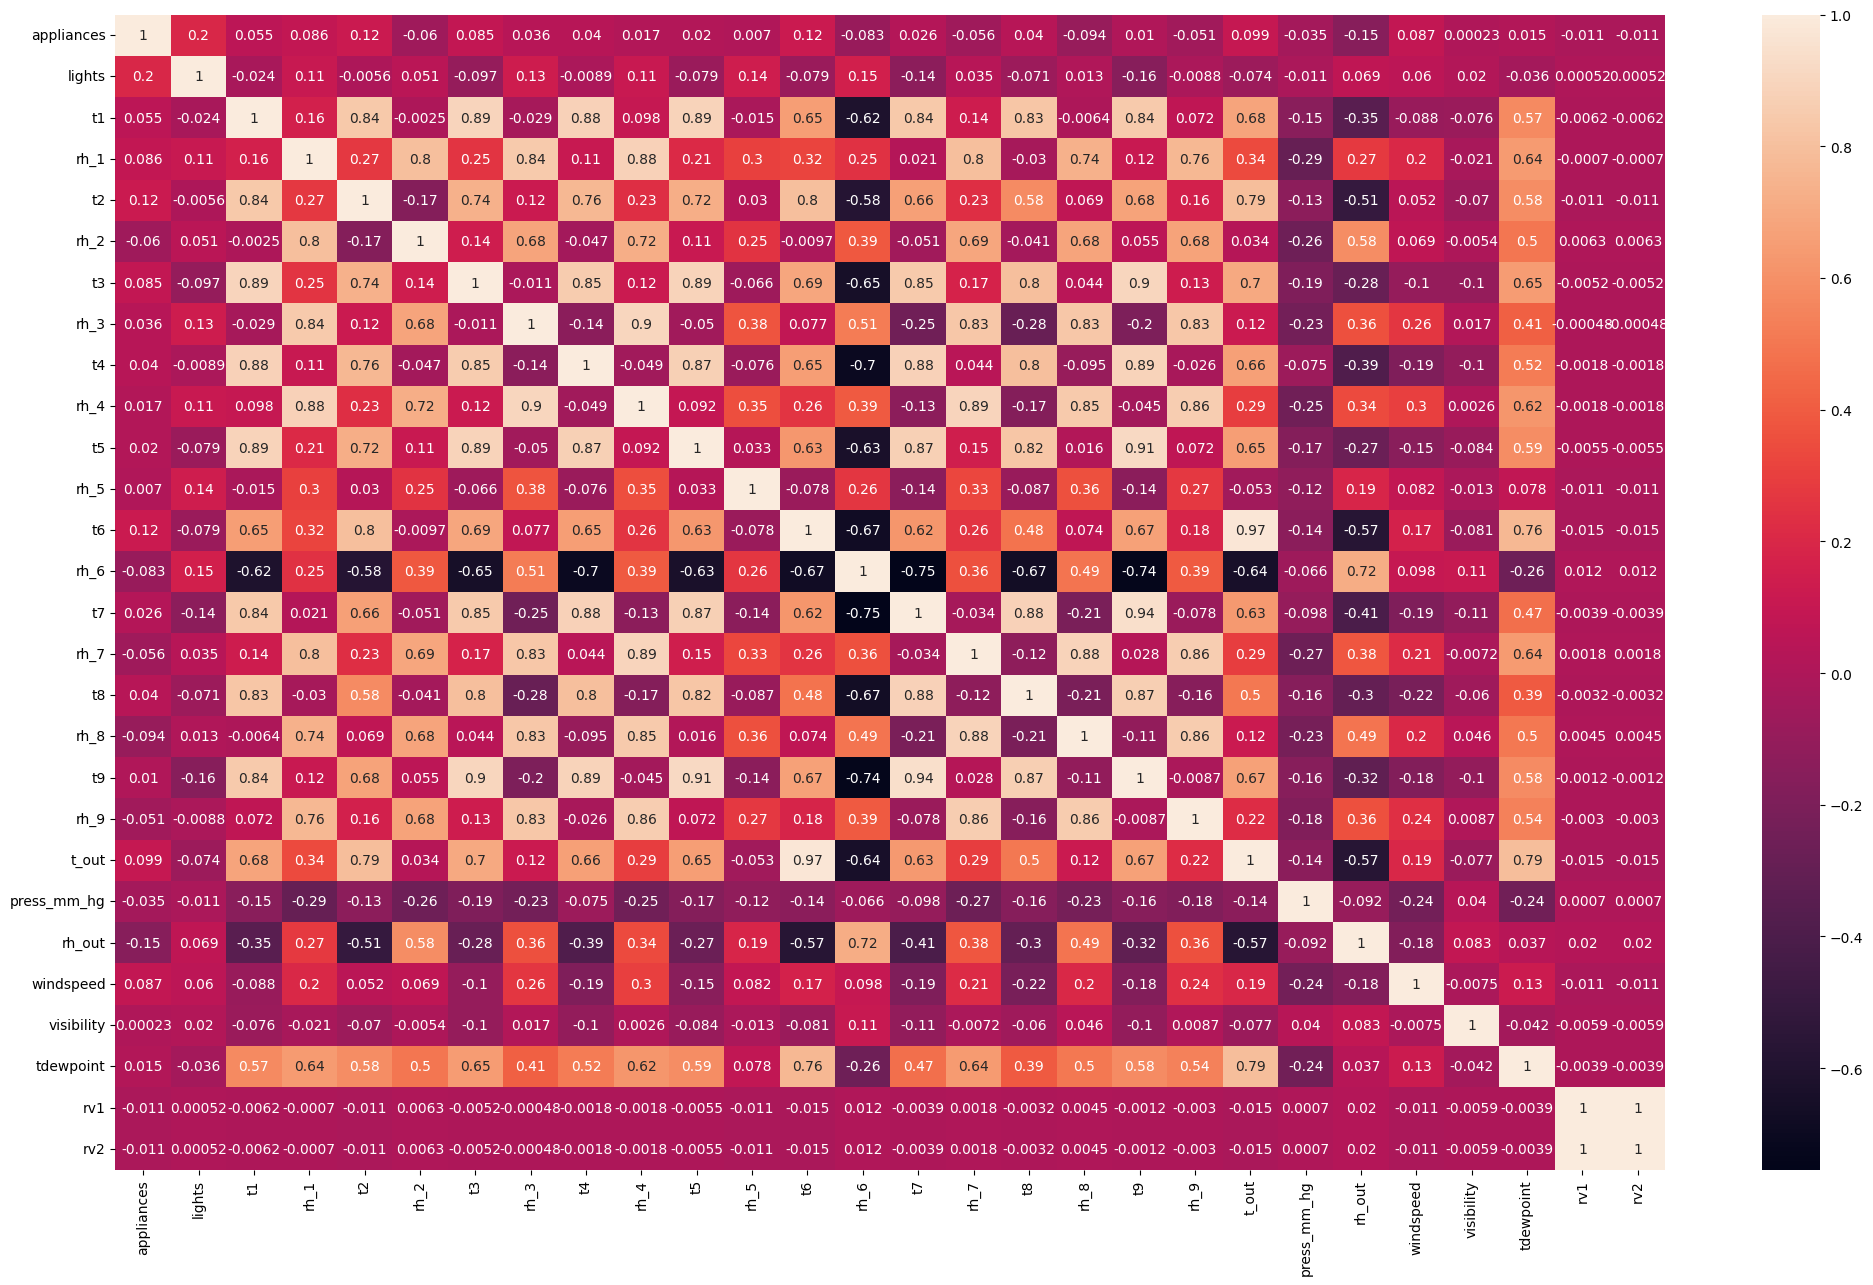

In [ ]:
# Chart - 8 visualization code

#plotting a correlation heatmap for all variables
plt.figure(figsize=(25,15))
dataplot = sns.heatmap(Dataset.corr(),annot=True)
plt.show('jpg')

##### 1. Why did you pick the specific chart?

This chart helps us to view the overall linear correlation for all variable combination with specific value.

##### 2. What is/are the insight(s) found from the chart?


The first insight I noticed is no variable is directly correlated with the target variable. The maximum correlation is with the lights which is just 0.2.And ofcourse it has multi colinearity in it.Any variable are highly positively or negatively correlated with each other.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Many features are highly correlated with each other so removing those variable would save some cost to the company.

#### Chart - 9

In [ ]:
df1 = Dataset.copy()

In [ ]:
#To include time from date column for analysis of appliances energy prediction from time and day point of view

df1["exact_date"] = df1['date'].astype(str).str.split(' ').str[0]
df1["hours"] = df1['date'].astype(str).str.split(':').str[0].str.split(" ").str[1].astype(int)
df1["seconds"] = df1['date'].astype(str).str.split(':').str[1].astype(int).mul(60)

df1["week"] = df1['date'].astype(str).str.split(' ').str[0]
df1["week"] = df1['week'].apply(dateutil.parser.parse, dayfirst=True)
df1["weekday"] = df1['week'].dt.dayofweek.astype(int)
df1["week"] = df1['week'].dt.day_name()

df1['log_appliances'] = np.log(df1.appliances)
df1['hour*lights'] = df1.hours * df1.lights
df1['hour_avg'] = df1.groupby('hours')["appliances"].transform('mean')

df1.head(2)


date  appliances  lights     t1       rh_1  \
date                                                                            
2016-01-11 17:00:00 2016-01-11 17:00:00          60      30  19.89  47.596667   
2016-01-11 17:10:00 2016-01-11 17:10:00          60      30  19.89  46.693333   

                       t2     rh_2     t3   rh_3    t4  ...        rv1  \
date                                                    ...              
2016-01-11 17:00:00  19.2  44.7900  19.79  44.73  19.0  ...  13.275433   
2016-01-11 17:10:00  19.2  44.7225  19.79  44.79  19.0  ...  18.606195   

                           rv2  exact_date  hours  seconds     week  weekday  \
date                                                                           
2016-01-11 17:00:00  13.275433  2016-01-11     17        0  Tuesday        1   
2016-01-11 17:10:00  18.606195  2016-01-11     17      600  Tuesday        1   

                     log_appliances  hour*lights    hour_avg  
date                                                          
2016-01-11 17:00:00        4.094345          510  161.352657  
2016-01-11 17:10:00        4.094345          510  161.352657  

[2 rows x 37 columns]

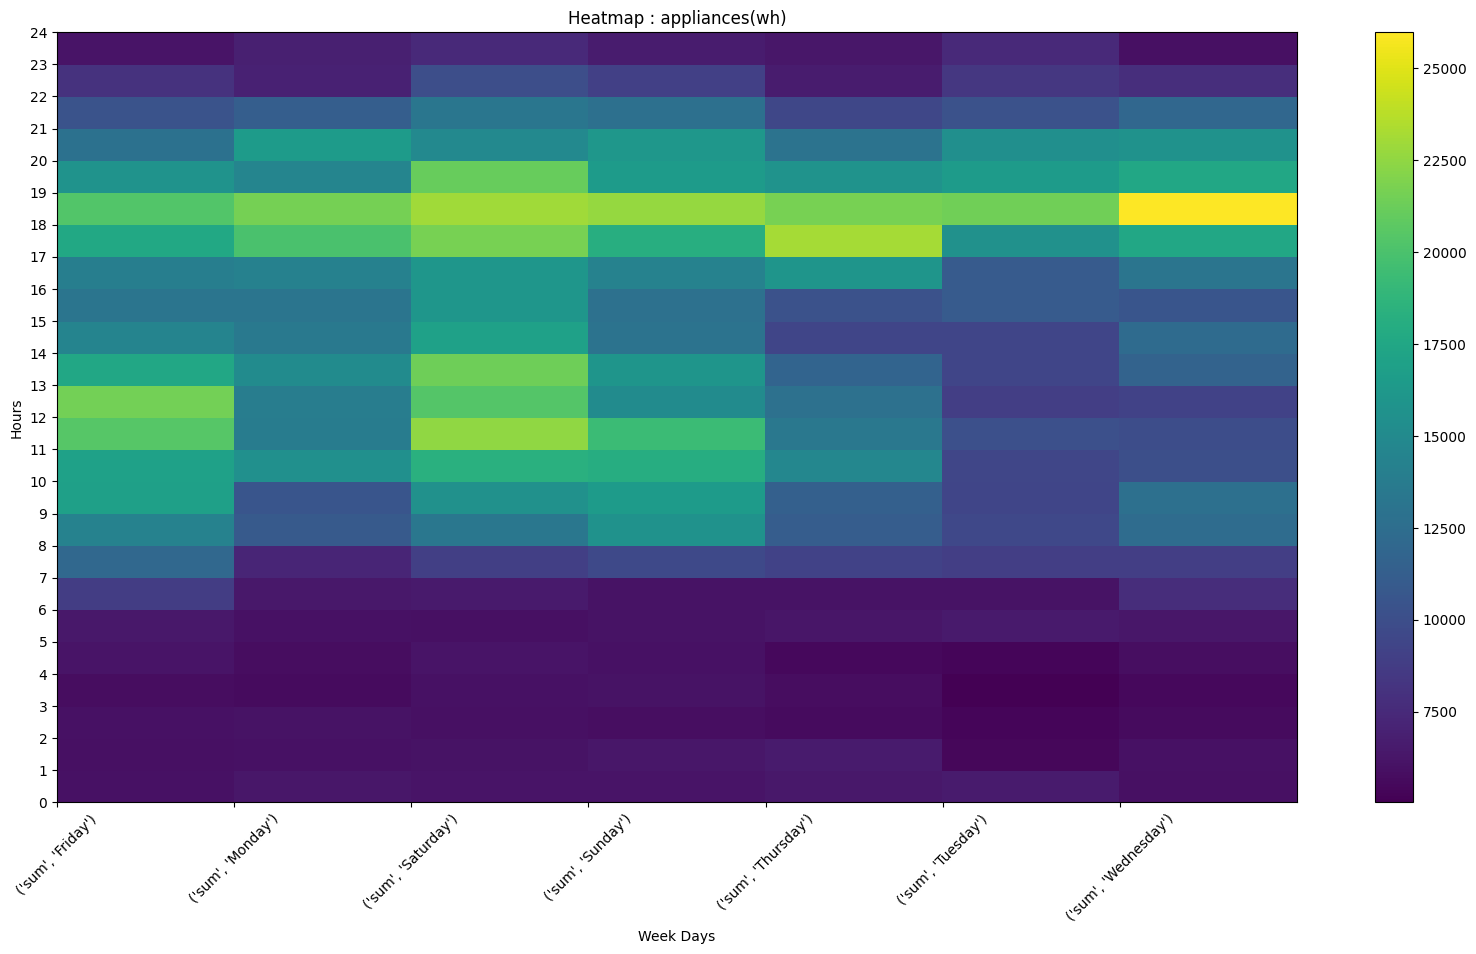

In [ ]:
# Chart - 9 visualization code
days=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
arranged_day = pd.Categorical(df1["week"], categories=days,ordered=True)
day_series = pd.Series(arranged_day)
table = pd.pivot_table(df1,index=["hours"],
               values="appliances",columns="week",
               aggfunc=[np.sum],fill_value=0)

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Heatmap : appliances(wh)')

heatmap = ax.pcolor(table)

ax.set_xlabel("Week Days")
ax.set_ylabel("Hours")

plt.colorbar(heatmap)
ax.set_yticks(range(len(table.index)+1))
ax.set_xticks(range(len(table.columns)))

ax.set_xticklabels(table.columns, rotation=45)

plt.show('jpg')


##### 1. Why did you pick the specific chart?

It shows the charts very ornamentally

##### 2. What is/are the insight(s) found from the chart?

As we know Saturday is weekend is the start of week, very obviously the energy consumption will be high on these days.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 the insights gained from analyzing the energy consumption data can be valuable for making informed decisions to optimize energy usage, reduce costs, and improve operational efficiency.
 To determine the actual impact on business growth, a more comprehensive analysis considering the business's specific objectives, industry, and other relevant factors would be necessary.

#### Chart - 10

Maximum energy usage recorded at time 18:50:00


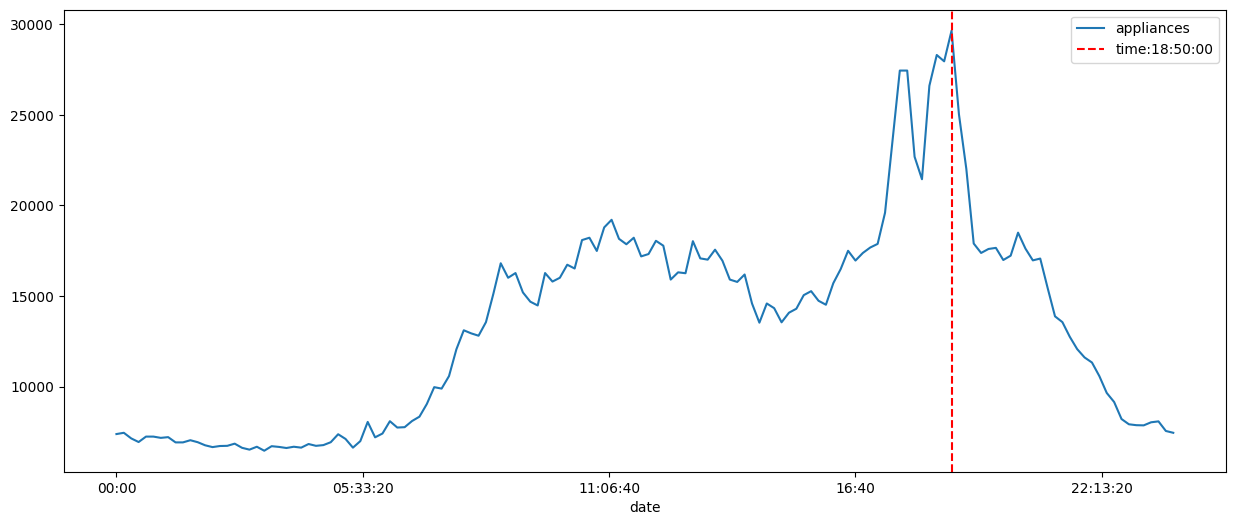

In [ ]:
# Chart - 10 visualization code

# Plotting usage of Energy grouping time of the day
fig, ax= plt.subplots(figsize=(15,6))

twise_usage=df1.groupby(df1["date"].dt.time).appliances.sum()
max_tusage=twise_usage.argmax()
twise_usage.plot(kind="line",ax=ax)

# twise_usage.index[max_tusage]
plt.axvline(x=twise_usage.index[max_tusage], label=f"time:{twise_usage.index[max_tusage]}",color="red", linestyle="--")
plt.legend();
print(f"Maximum energy usage recorded at time {twise_usage.index[max_tusage]}")
plt.show('jpg')

##### 1. Why did you pick the specific chart?

Line charts are a fundamental chart type generally used to show change in values across time.

##### 2. What is/are the insight(s) found from the chart?

High electricity consumption is observed during evening hours between 16:00 to 20:00

at night hours from 23:00 to  6:00, the power load is below 50Wh which is quite obvious as most appliances at this time will be off or on standby

between  9 to 13, consumption is > 100wh as it is breakfast and after that the consumpition is less than 100Wh.  

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, I think this trend which we noticed in the chart may helps us to estimate the future usage of the appliances.

#### Chart - 15 - Pair Plot

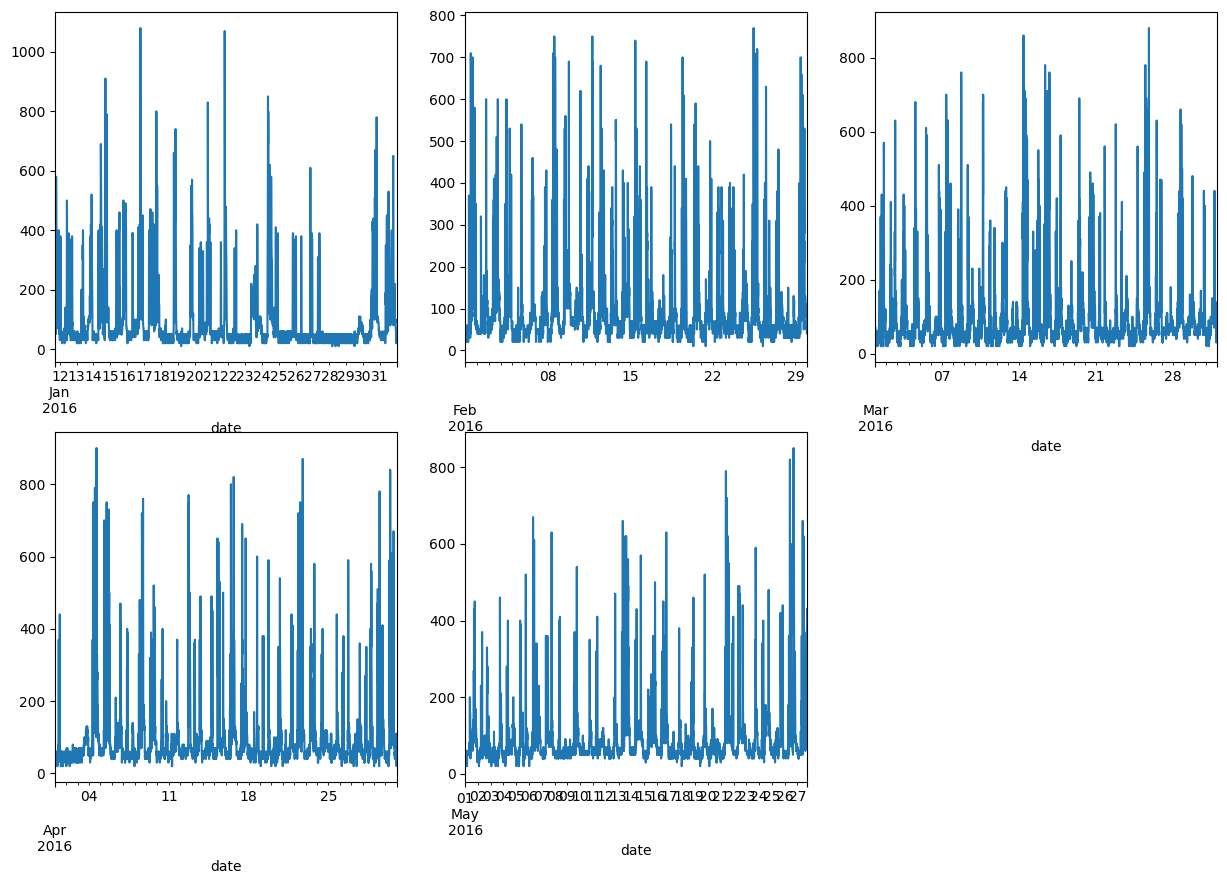

In [ ]:
# Pair Plot visualization code

#Creating plot for date vs appliance consumption for different months separately
for month in [1,2,3,4,5]:
    plt.subplot(2,3,month)
    Dataset[Dataset['date'].dt.month == month]['appliances'].plot(figsize= (15,10))
plt.show('jpg')

##### 1. Why did you pick the specific chart?

I chose line plot, because in time series it is easy to witness the trend across time easily.



##### 2. What is/are the insight(s) found from the chart?

I separately plotted plots for different month.We could see that Jan,March and May some similarity in pattern and Apr and Feb has some similarity.



####3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From these we could see that for every alternative month there is some pattern with it and also we cannot come to the conclusion having only 5 months of data.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : Every even number month is same

Alternative Hypothesis : Every even number month is not same

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value


from scipy.stats import ttest_ind

# Extracting Data for Different Months:
month2 =[data[1]['appliances'] for data in Dataset.iterrows() if data[1]['date'].month == 2]
month4 =[data[1]['appliances'] for data in Dataset.iterrows() if data[1]['date'].month == 4]


month2_mean = np.mean(month2)
month4_mean = np.mean(month4)

# Printing Mean and Standard Deviation Values:
print("month2 mean value:",month2_mean)
print("month4 mean value:",month4_mean)

#Calculating Means and Standard Deviations:
month2_std = np.std(month2)
month4_std = np.std(month4)

# Printing Mean and Standard Deviation Values:A
print("week1 std value:",month2_std)
print("week2 std value:",month4_std)

# Conducting a T-Test and Analyzing the Result:
ttest,pval = ttest_ind(month2,month4)

print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

month2 mean value: 100.94588122605364
month4 mean value: 98.88888888888889
week1 std value: 102.34202358496152
week2 std value: 103.88458101585387
p-value 0.3581227616775601
we accept null hypothesis


##### Which statistical test have you done to obtain P-Value?

I did Two-sample T-test.A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features.

##### Why did you choose the specific statistical test?

The One Sample t Test determines whether the sample mean is statistically different from a known or hypothesised population mean. The One Sample t Test is a parametric test.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : Every even number month is same

Alternative Hypothesis : Every even number month is not same

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import ttest_ind

# Extracting Data for Different Months:
month3 =[data[1]['appliances'] for data in Dataset.iterrows() if data[1]['date'].month == 3]
month5 =[data[1]['appliances'] for data in Dataset.iterrows() if data[1]['date'].month == 5]

month3_mean = np.mean(month3)
month5_mean = np.mean(month5)

# Printing Mean and Standard Deviation Values:
print("month2 mean value:",month3_mean)
print("month4 mean value:",month5_mean)

#Calculating Means and Standard Deviations:
month3_std = np.std(month3)
month5_std = np.std(month5)

# Printing Mean and Standard Deviation Values:
print("week1 std value:",month3_std)
print("week2 std value:",month5_std)

# Conducting a T-Test and Analyzing the Result:
ttest,pval = ttest_ind(month3,month5)

print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

month2 mean value: 96.95340501792114
month4 mean value: 94.19932520114197
week1 std value: 98.99604268303091
week2 std value: 86.78389428849006
p-value 0.1806688872190642
we accept null hypothesis


##### Which statistical test have you done to obtain P-Value?

A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features

##### Why did you choose the specific statistical test?

The One Sample t Test determines whether the sample mean is statistically different from a known or hypothesised population mean. The One Sample t Test is a parametric test.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
#copying df
df_copy = Dataset.copy(deep=True)

# Setting a Seed for Reproducibility:
SEED = 42

In [ ]:
df_copy

date  appliances  lights         t1  \
date                                                                     
2016-01-11 17:00:00 2016-01-11 17:00:00          60      30  19.890000   
2016-01-11 17:10:00 2016-01-11 17:10:00          60      30  19.890000   
2016-01-11 17:20:00 2016-01-11 17:20:00          50      30  19.890000   
2016-01-11 17:30:00 2016-01-11 17:30:00          50      40  19.890000   
2016-01-11 17:40:00 2016-01-11 17:40:00          60      40  19.890000   
...                                 ...         ...     ...        ...   
2016-05-27 17:20:00 2016-05-27 17:20:00         100       0  25.566667   
2016-05-27 17:30:00 2016-05-27 17:30:00          90       0  25.500000   
2016-05-27 17:40:00 2016-05-27 17:40:00         270      10  25.500000   
2016-05-27 17:50:00 2016-05-27 17:50:00         420      10  25.500000   
2016-05-27 18:00:00 2016-05-27 18:00:00         430      10  25.500000   

                          rh_1         t2       rh_2         t3       rh_3  \
date                                                                         
2016-01-11 17:00:00  47.596667  19.200000  44.790000  19.790000  44.730000   
2016-01-11 17:10:00  46.693333  19.200000  44.722500  19.790000  44.790000   
2016-01-11 17:20:00  46.300000  19.200000  44.626667  19.790000  44.933333   
2016-01-11 17:30:00  46.066667  19.200000  44.590000  19.790000  45.000000   
2016-01-11 17:40:00  46.333333  19.200000  44.530000  19.790000  45.000000   
...                        ...        ...        ...        ...        ...   
2016-05-27 17:20:00  46.560000  25.890000  42.025714  27.200000  41.163333   
2016-05-27 17:30:00  46.500000  25.754000  42.080000  27.133333  41.223333   
2016-05-27 17:40:00  46.596667  25.628571  42.768571  27.050000  41.690000   
2016-05-27 17:50:00  46.990000  25.414000  43.036000  26.890000  41.290000   
2016-05-27 18:00:00  46.600000  25.264286  42.971429  26.823333  41.156667   

                            t4  ...         t9     rh_9      t_out  \
date                            ...                                  
2016-01-11 17:00:00  19.000000  ...  17.033333  45.5300   6.600000   
2016-01-11 17:10:00  19.000000  ...  17.066667  45.5600   6.483333   
2016-01-11 17:20:00  18.926667  ...  17.000000  45.5000   6.366667   
2016-01-11 17:30:00  18.890000  ...  17.000000  45.4000   6.250000   
2016-01-11 17:40:00  18.890000  ...  17.000000  45.4000   6.133333   
...                        ...  ...        ...      ...        ...   
2016-05-27 17:20:00  24.700000  ...  23.200000  46.7900  22.733333   
2016-05-27 17:30:00  24.700000  ...  23.200000  46.7900  22.600000   
2016-05-27 17:40:00  24.700000  ...  23.200000  46.7900  22.466667   
2016-05-27 17:50:00  24.700000  ...  23.200000  46.8175  22.333333   
2016-05-27 18:00:00  24.700000  ...  23.200000  46.8450  22.200000   

                     press_mm_hg     rh_out  windspeed  visibility  tdewpoint  \
date                                                                            
2016-01-11 17:00:00        733.5  92.000000   7.000000   63.000000   5.300000   
2016-01-11 17:10:00        733.6  92.000000   6.666667   59.166667   5.200000   
2016-01-11 17:20:00        733.7  92.000000   6.333333   55.333333   5.100000   
2016-01-11 17:30:00        733.8  92.000000   6.000000   51.500000   5.000000   
2016-01-11 17:40:00        733.9  92.000000   5.666667   47.666667   4.900000   
...                          ...        ...        ...         ...        ...   
2016-05-27 17:20:00        755.2  55.666667   3.333333   23.666667  13.333333   
2016-05-27 17:30:00        755.2  56.000000   3.500000   24.500000  13.300000   
2016-05-27 17:40:00        755.2  56.333333   3.666667   25.333333  13.266667   
2016-05-27 17:50:00        755.2  56.666667   3.833333   26.166667  13.233333   
2016-05-27 18:00:00        755.2  57.000000   4.000000   27.000000  13.200000   

                           rv1        rv2  
date                                       
2016

In [ ]:
#splitting the data into train test
y = df_copy['appliances']
df_copy.drop('appliances',inplace= True,axis=1)
X = df_copy

x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.13, random_state=SEED)

In [ ]:
print("X_train : ",x_train.shape)
print("y_train : ",y_train.shape)

print("X_test : ",x_test.shape)
print("y_test : ",y_test.shape)

#deleting unused variables
del X,y

X_train :  (17169, 28)
y_train :  (17169,)
X_test :  (2566, 28)
y_test :  (2566,)


In [ ]:
# Handling Missing Values & Missing Value Imputation
print(x_train.isna().sum().sum())

0


#### What all missing value imputation techniques have you used and why did you use those techniques?

This Dataset doesn't have any null values.So there is no need for any imputation.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments


#creating custom Transformer for handling ouliers
class HandleOutliers(BaseEstimator,TransformerMixin):
    def __init__(self):
        return None

    def fit(self,X,y = None):
        '''
        Description : It notes the 90 and 10 percentile of each features in the dataframe.
                      So that we can impute the outliers with the value of noted percentile.
        Parameters:
            X : Dataframe which you want to note percentile.
            y : It is not required.
        '''
        outlier_estimator_dict = {}
        for col in X.columns:
            upper_bound = np.percentile(X[col],90)
            lower_bound = np.percentile(X[col],10)
            outlier_estimator_dict[col] = {
                "upper_bound": upper_bound,
                "lower_bound": lower_bound}
        self.outlier_estimator_dict = outlier_estimator_dict
        return self


    def transform(self, X, y = None):
        '''
        Description : It replaces the outliers with the noted percentile value of respective column
        Parameters:
            X : Dataframe you want to replace outliers.
        Returns :  A Dataframe with removed outliers.
        '''
        for col in X.columns:
            col_dict = self.outlier_estimator_dict[col]
            X[col] = np.where(X[col]>col_dict['upper_bound'], col_dict['upper_bound'],X[col])
            X[col] = np.where(X[col]<col_dict['lower_bound'], col_dict['lower_bound'],X[col])

        self.final_column_names = X.columns
        return X

##### What all outlier treatment techniques have you used and why did you use those techniques?

I just iterated over all columns of train data and noted the 90th percentile and 10th percentile of each_column along with the respective column_name.After this process, I have the 90th and 10th percentile of all columns and Now I capped the value of each columns which is more than 90th percentile and less than 10th percentile.Also I can cap the test data with the same percentile value which I calculated using train data

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#Custom transformer for adding PCA features

class AddPcaFeatures(BaseEstimator,TransformerMixin):
    def __init__(self,number_of_pca_columns = None):
        '''
        Parameters :
            number_of_pca_columns :(Int) Number of final dimension you want.
        '''
        self.number_of_pca_columns = number_of_pca_columns
        return None

    def fit(self,X, y = None):
        '''
        Description : It fits the data in the PCA algorithm
        Parameters:
            X : Dataframe which fits the PCA algorithm
        '''
        if self.number_of_pca_columns != None:
            self.pca = PCA(n_components= self.number_of_pca_columns)
            self.pca.fit(X)
        return self

    def transform(self,X,y = None):
        '''
        Parameters :
            X : Dataframe you want to reduce the dimension
        Returns : A Dataframe with the pca features along concatinated with the input Dataframe.
        '''
        if self.number_of_pca_columns != None:
            pca_column_names = [f'pca_{val}' for val in range(1,self.number_of_pca_columns+1)]
            pca_features = self.pca.transform(X)
            pca_features = pd.DataFrame(pca_features,columns= pca_column_names,index=X.index)
            X = pd.concat([X,pca_features],axis=1)

        return X


In [ ]:
#Custom Transformers for adding extra features
class AddCentralTendencyFeatures(BaseEstimator,TransformerMixin):
    def __init__(self,measure):
        '''
        Parameters :
            measure : 'mean' or 'median' depend on which features you want to add.
        '''
        self.measure = measure
        return None

    def fit(self,X, y = None):
        return self

    def transform(self,X, y = None):
        '''
        Description : Adds either mean or median columns of a temperature and humidity column for each observation.
        Parameter : Dataframe which you want to calculate
        Returns : Input Dataframe concatinated with the calculated features.
        '''
        if self.measure.lower() == 'mean':
            X['avg_house_temp'] = X[[col for col in X.columns if (('t' in col) and (len(col)<3))]].mean(axis = 1)
            X['avg_humidity_percentage'] = X[[col for col in X.columns if (('rh_' in col) and (len(col)<5))]].mean(axis = 1)

        else:
            X['med_house_temp'] = X[[col for col in X.columns if (('t' in col) and (len(col)<3))]].median(axis = 1)
            X['med_humidity_percentage'] = X[[col for col in X.columns if (('rh_' in col) and (len(col)<5))]].median(axis = 1)

        return X

In [ ]:
class AddDateFeatures(BaseEstimator,TransformerMixin):
    def __init__(self):
        return None

    def fit(self,X, y = None):
        return self


    def transform(self,X,y=None):
        X['day'] = X.date.dt.day
        X['month'] = X.date.dt.month
        return X.drop('date',axis = 1)

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

class RemoveCorrelatedFeatures(BaseEstimator,TransformerMixin):
    def __init__(self):
        return None

    def fit(self,X,y):
        '''
        Description : Remove correlated features with less correlation with target
        X : Dataframe with only features
        y : Target Series
        '''
        col_corr = set()
        corr_matrix = X.corr()

        for i in range(len(corr_matrix.columns)):
            for j in range(i):
                if abs(corr_matrix.iloc[i, j]) > 0.85:
                    corr_i, _ = pearsonr(y, X.iloc[:,i])
                    corr_j, _ = pearsonr(y,X.iloc[:,j])
                    if abs(corr_i) < abs(corr_j):
                        colname = corr_matrix.columns[i]
                        col_corr.add(colname)
                    else:
                        colname = corr_matrix.columns[i]
                        col_corr.add(colname)

        self.correlated_columns = col_corr
        self.final_column_names = set(X.columns) - self.correlated_columns
        return self

    def transform(self, X,y = None):
         '''
         Parameter : The Dataframe you want to remove correlated features
         Returns : Dataframe by removing the correlated features.
         '''
         return X.drop(self.correlated_columns,axis=1)

##### What all feature selection methods have you used  and why?

First I created two features for average/median house temperature and average/median humditiy percentage. Second I to remove multi collinearity, I iterated over every column and removed the column with is high correlation with other features and also doesn't have impact to target variable.

##### Which all features you found important and why?

I dropped rv2 because is same as rv1. Next I dropped features which have high corelation with other variables and along with less correaltion with the target variable. Some are 'rh_3','rh_4','rh_7','rh_8','rh_9','rv2','t3','t5','t8','t9','t_out' these are variables I rejected

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

#Custom Transformer for applying log for the selective features.
class ApplyTransformation(BaseEstimator,TransformerMixin):
     def __init__(self):
          return None

     def fit(self,X,y = None):
          return self

     def transform(self,X,y = None):
          X[['t9','rv1','rv2','windspeed']] = np.log10(X[['t9','rv1','rv2','windspeed']])
          X['visibility'] = np.where(X['visibility']>40,1,0)
          return X

### 6. Data Scaling

In [ ]:
# Scaling your data
standard_scalar = StandardScaler()

##### Which method have you used to scale you data and why?

I use here StandardScaler, by using StandardScaler, we are bringing our data onto a common scale, making it more suitable for various machine learning algorithms and improving the stability and convergence of those algorithms during training.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, I used the dimensionality reduction in my preprocessing pipeline which is PCA. I used this in my featuring engineering steps to add features which I got after dimensionality reduction.

Why I used PCA:

**it mproved Model Performance:** Fewer dimensions can lead to faster model training and evaluation.

**Noise Reduction:** Principal components can help remove noise and focus on the most significant patterns in the data.

**Visualization:** Reduced dimensionality makes it easier to visualize and interpret the data.

**Avoid Overfitting:** Fewer features may reduce the risk of overfitting, especially if some features are less relevant.

### 8. Data Splitting

##### What data splitting ratio have you used and why?

I complete this process in Feature Engineering & Data Pre-processing. I split the data into two parts train and test split. I took 0.13 percentage of data as test. As we have very less number of data I am going to use very small subset as validation data.

## ***7. ML Model Implementation***

In [ ]:
#Assembled all the preprocessing Transformers in order

preprocessing_pipeline = Pipeline([
    ('transformation',ApplyTransformation()),
    ('remove_outliers',HandleOutliers()),
    ('add_central_tendency_features',AddCentralTendencyFeatures(measure='mean')),
    ('add_Date_Features',AddDateFeatures()),
    ('add_pca_features',AddPcaFeatures(number_of_pca_columns = 3)),
    ('remove_correlated_features', RemoveCorrelatedFeatures()),
    ('standard_scalar',StandardScaler())
])

In [ ]:
#Fitting and Transforming the train and test
X_train = preprocessing_pipeline.fit_transform(x_train,y_train)
X_test = preprocessing_pipeline.transform(x_test)

In [ ]:
#making the transformed data into DataFrame
x_train = pd.DataFrame(x_train, columns = preprocessing_pipeline['standard_scalar'].feature_names_in_)
x_test = pd.DataFrame(x_test,columns = preprocessing_pipeline['standard_scalar'].feature_names_in_)

In [ ]:
#printing the shapes of our data
print("X_train : ",x_train.shape)
print("y_train : ",y_train.shape)

print("X_test : ",x_test.shape)
print("y_test : ",y_test.shape)

X_train :  (17169, 19)
y_train :  (17169,)
X_test :  (2566, 19)
y_test :  (2566,)


In [ ]:
#display cross validation scores
def display_scores(scores):
    print("Scores",scores)
    print("Mean",scores.mean())
    print("Standard Deviation",scores.std())

### ML Model - 1

In [ ]:
# these list stores the values of tested models.
Model=[]
train_accu=[]
test_accu=[]

In [ ]:
# ML Model - 1 Implementation
# Starting of modelling for the data
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Implementation
lin_model = linear_model.LinearRegression()

# Fit the Algorithm
lin_model.fit(X_train,y_train)

# Model performance on test data
y1_pred = lin_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from math import sqrt

# Function to evaluate the models
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    r_score = 100*r2_score(test_labels,predictions)
    accuracy = 100 - mape
    print(model,'\n')
    print('Average Error: {:0.4f} degrees'.format(np.mean(errors)))
    print('Variance score R^2  : {:0.2f}%' .format(r_score))
    print("Accuracy :{}%\n".format(accuracy))

In [ ]:
evaluate(lin_model, X_test , y_test)

LinearRegression() 

Average Error: 53.2046 degrees
Variance score R^2  : 13.43%
Accuracy :34.15832110696418%



In [ ]:
train_accuracy = lin_model.score(X_train,y_train)
test_accuracy = r2_score(y_test,y1_pred)
print( 'Train accuracy is ',train_accuracy)
print(' Test accuracy is ', test_accuracy)

Train accuracy is  0.1278859623333355
 Test accuracy is  0.1342594102002903


In [ ]:
Model.append('Linear_Regression')
train_accu.append(train_accuracy)
test_accu.append(test_accuracy)

 #### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

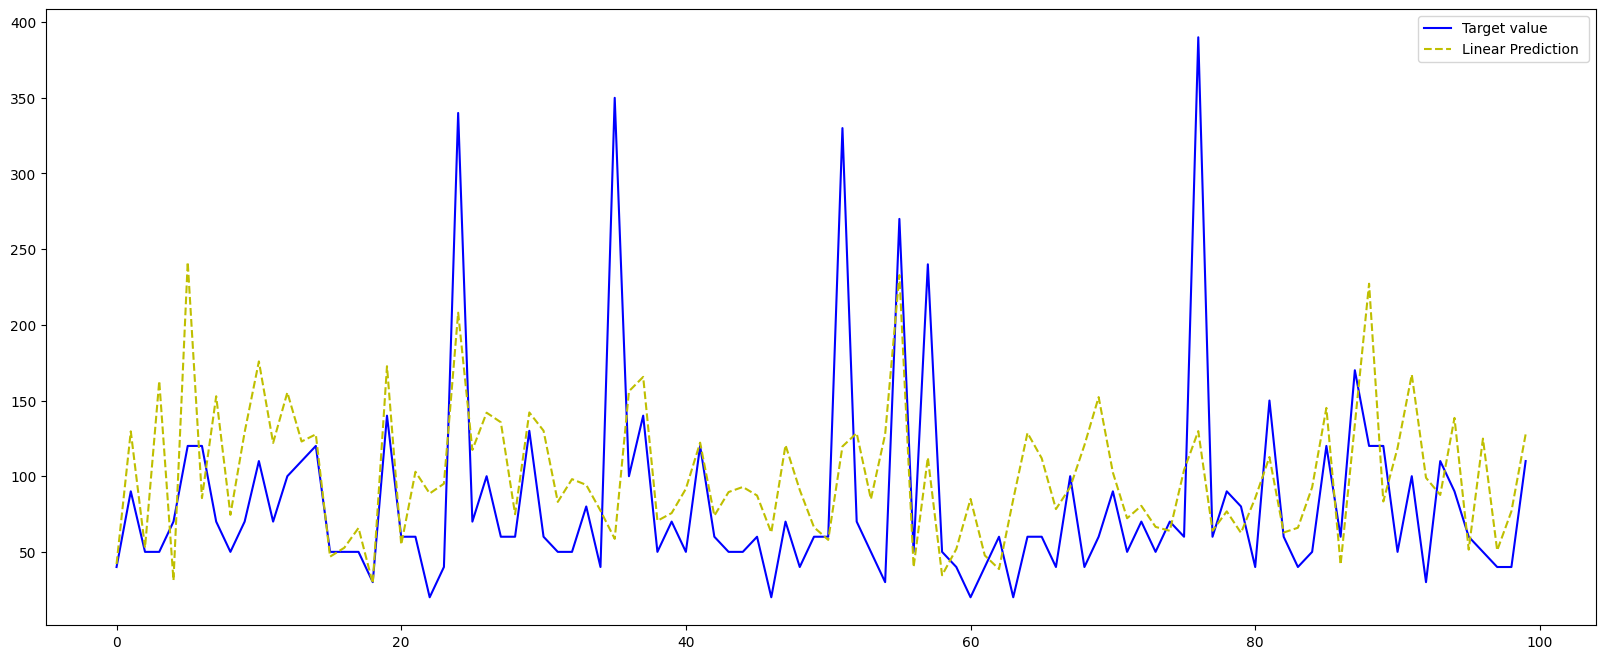

In [ ]:
# Visualizing evaluation Metric Score chart

fig = plt.figure(figsize=(20,8))
plt.plot(y_test[:100].values,label='Target value',color='b')
plt.plot(y1_pred[:100],label='Linear Prediction ', linestyle='--', color='y')

plt.legend(loc=1)
plt.show('jpg')

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.) instead of KFold I use TimeSeriesSplit (10 splits) due to time series data


from sklearn.model_selection import TimeSeriesSplit

cv = TimeSeriesSplit(n_splits = 10)

print('Linear Model:')
scores = cross_val_score(lin_model, X_train, y_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(lin_model, X_train, y_train, cv=cv,scoring='r2')
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

Linear Model:
Accuracy: 44.08 (+/- 4.54) degrees
R^2: 0.12 (+/- 0.04) degrees


In [ ]:

# Define the hyperparameter grid for GridSearchCV
grid_values = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# Perform GridSearchCV
lin_model_grid = GridSearchCV(lin_model, param_grid=grid_values, cv=5, scoring='neg_mean_squared_error')
lin_model_grid.fit(X_train, y_train)

# Get the best hyperparameters and model from GridSearchCV
best_params_grid = lin_model_grid.best_params_
best_model_grid = lin_model_grid.best_estimator_

# Print results for GridSearchCV
print("GridSearchCV Results:")
print("Best Hyperparameters:", best_params_grid)
print("Best Model:", best_model_grid)

GridSearchCV Results:
Best Hyperparameters: {'fit_intercept': True, 'positive': False}
Best Model: LinearRegression()


In [ ]:
train_accuracy = lin_model_grid.score(X_train, y_train)
test_accuracy = r2_score(y_test, lin_model_grid.predict(X_test))
print('Train accuracy is ',train_accuracy)
print('Test accuracy is ', test_accuracy)

Train accuracy is  -9354.914237546525
Test accuracy is  0.1342594102002903


In [ ]:
Model.append('GridSearchCV')
train_accu.append(train_accuracy)
test_accu.append(test_accuracy)

##### Which hyperparameter optimization technique have you used and why?

for cross validation I have used GridSearchCv, as it is the best suitable method for finding the hyperparameter values.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

no i dont see the improvement

### ML Model - 2

In [ ]:
# ML Model -  Implementation

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()

# Fit the Algorithm
rf_model.fit(X_train, y_train)


y2_pred = rf_model.predict(X_test)

In [ ]:
evaluate(rf_model, X_test, y_test)

RandomForestRegressor() 

Average Error: 31.0006 degrees
Variance score R^2  : 53.95%
Accuracy :66.4942681315786%



In [ ]:
# Visualizing evaluation Metric Score chart

train_accuracy = lin_model.score(X_train,y_train)
test_accuracy = r2_score(y_test,y2_pred)
print('Train accuracy for RandomForestRegressor is ',train_accuracy)
print('Test accuracy for RandomForestRegressor is ',test_accuracy)

Train accuracy for RandomForestRegressor is  0.1278859623333355
Test accuracy for RandomForestRegressor is  0.5394810990392473


In [ ]:
Model.append('RandomForestRegressor')
train_accu.append(train_accuracy)
test_accu.append(test_accuracy)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

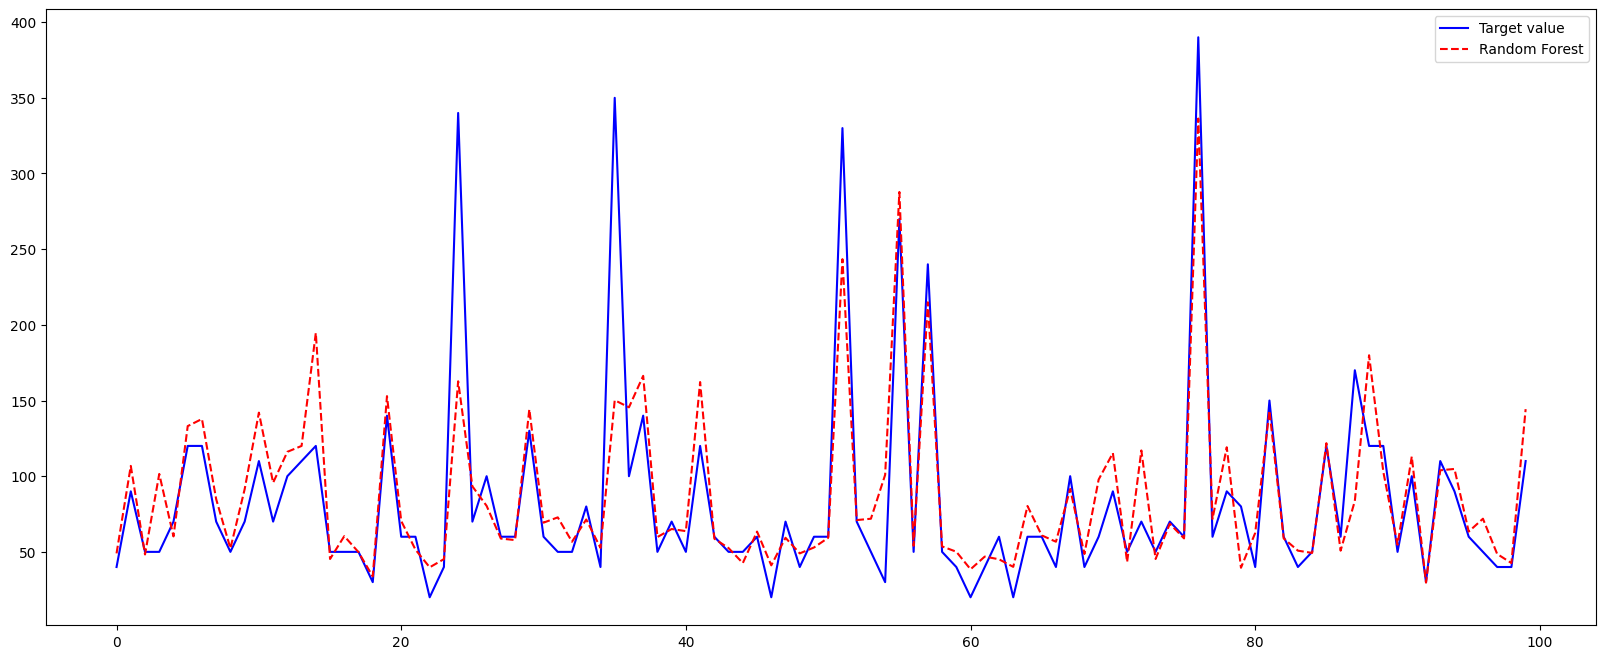

In [ ]:
#plotting graph predicted vs actual target

fig = plt.figure(figsize=(20,8))
plt.plot(y_test[:100].values,label='Target value',color='b')
plt.plot(y2_pred[:100],label='Random Forest', linestyle='--', color='r')

plt.legend(loc=1)
plt.show('jpg')

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
cv = TimeSeriesSplit(n_splits = 10)
print('Random Forest Model:')
scores = cross_val_score(rf_model, X_train, y_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(rf_model, X_train, y_train, cv=cv)
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

Random Forest Model:
Accuracy: 58.39 (+/- 13.06) degrees
R^2: 0.40 (+/- 0.23) degrees


In [ ]:

# hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)



RFR_cv = RandomForestRegressor()

# Fit the object to train dataset
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
RFR_cv_grid = GridSearchCV(rf_model, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the Algorithm
RFR_cv_grid.fit(X_train, y_train)
# Predict on the modle

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             scoring='roc_auc')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Create and train the model
RFR_cv_grid = RandomForestRegressor()  # You might need to pass hyperparameters here
RFR_cv_grid.fit(X_train, y_train)

# Check model attributes (optional)
print("Number of trees:", RFR_cv_grid.n_estimators)
# Print other relevant attributes if needed

# Calculate and print R-squared scores
train_predictions = RFR_cv_grid.predict(X_train)
train_accuracy = r2_score(y_train, train_predictions)

test_predictions = RFR_cv_grid.predict(X_test)
test_accuracy = r2_score(y_test, test_predictions)

print('Train R-squared is', train_accuracy)
print('Test R-squared is', test_accuracy)

Number of trees: 100
Train R-squared is 0.9356358476088237
Test R-squared is 0.5393290993638549


In [ ]:
Model.append('RFR_gridsearch_cv')
train_accu.append(train_accuracy)
test_accu.append(test_accuracy)

##### Which hyperparameter optimization technique have you used and why?

I choose "GridSearchCV" technique for hyperparameter optimization. GridSearchCV is a systematic approach to search through a predefined grid of hyperparameter values, using cross-validation to evaluate different combinations of hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

yes, the train accuracy has significantly improved from 0.127886 to 0.935925, and the test accuracy has also improved from 0.534530 to 0.545297. This demonstrates a substantial improvement in model performance after implementing changes. Remember to keep track of these changes for documentation and future reference.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

The difference between evaluation metric score of train dataset and test dataset is not big that means the model is overfitted. After hyper parameter tuning, eventhough we got better version of SVM it doesn't work with the data well. As we could see in the visualization the data is not predicting the high values in the target. So in the end, SVM not worked with this data because it has high error and uncapable of predicting peak values in the target values.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
XGBR=XGBRegressor()
# Fit the Algorithm
XGBR.fit(X_train, y_train)
# Predict on the model


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y3_pred = XGBR.predict(X_test)

In [ ]:
evaluate(XGBR, X_test, y_test)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) 

Average Error: 36.4821 degrees
Variance score R^2  : 47.27%
Accuracy :59.18945014052719%



In [ ]:
train_accuracy = XGBR.score(X_train, y_train)
test_accuracy = r2_score(y_test,y3_pred)
print('Train accuracy for the given model XGBRegressor is ',train_accuracy)
print('Test accuracy for the given model XGBRegressor is ',test_accuracy)

Train accuracy for the given model XGBRegressor is  0.8493896633127422
Test accuracy for the given model XGBRegressor is  0.47271234239121307


In [ ]:
Model.append('XGBRegressor')
train_accu.append(train_accuracy)
test_accu.append(test_accuracy)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

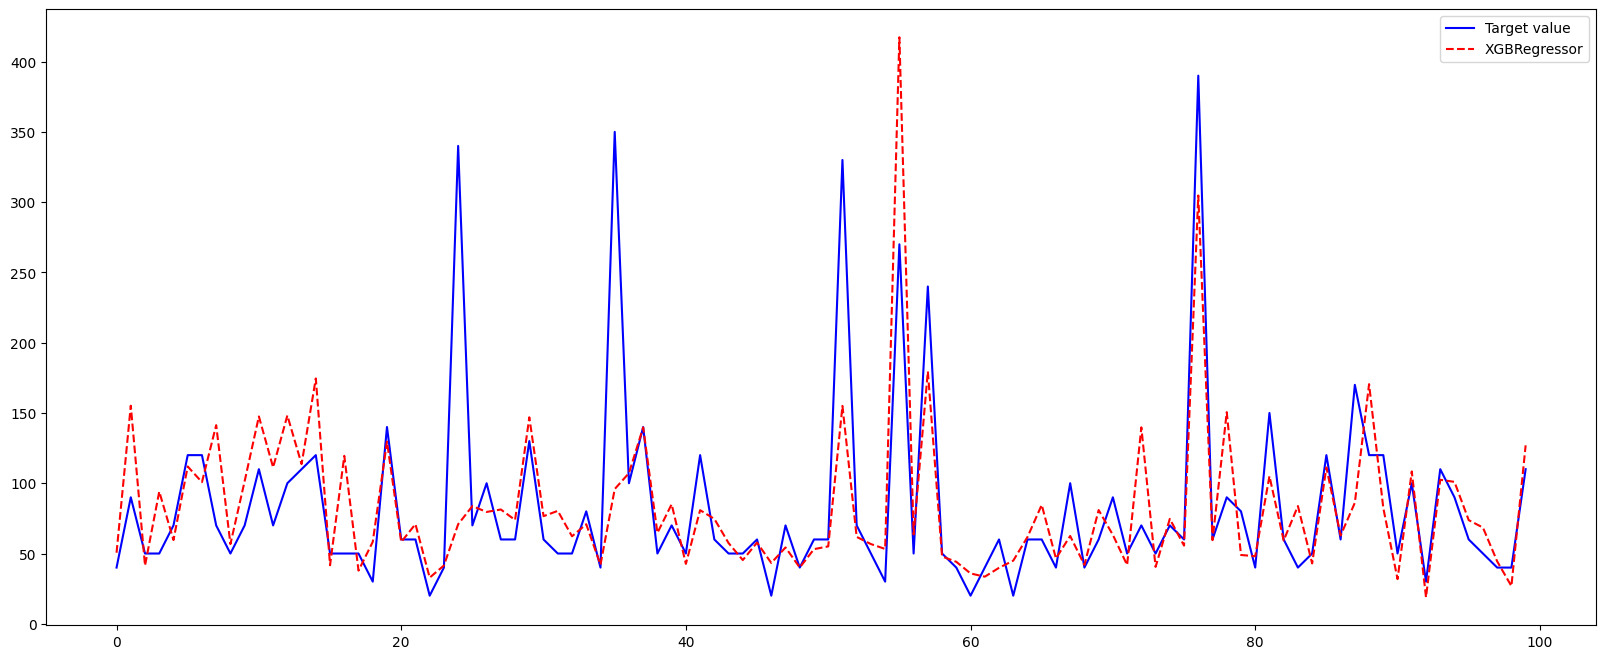

In [ ]:
# Visualizing evaluation Metric Score chart

fig = plt.figure(figsize=(20,8))
plt.plot(y_test[:100].values,label='Target value',color='b')
plt.plot(y3_pred[:100],label='XGBRegressor', linestyle='--', color='r')

plt.legend(loc=1)
plt.show('jpg')

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:

from xgboost import XGBRegressor

# Instantiate XGBRegressor
xgb_model = XGBRegressor()

# Perform cross-validation and print results
print('XGBRegressor:')
scores_mae = cross_val_score(xgb_model, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error')
print("Mean Absolute Error: %0.2f (+/- %0.2f) degrees" % (abs(scores_mae.mean()), abs(scores_mae.std()) * 2))

scores_r2 = cross_val_score(xgb_model, X_train, y_train, cv=cv, scoring='r2')
print("R^2: %0.2f (+/- %0.2f)" % (scores_r2.mean(), scores_r2.std() * 2))


XGBRegressor:
Mean Absolute Error: 44.62 (+/- 10.85) degrees
R^2: 0.35 (+/- 0.23)


In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
XGBR_CV =XGBRegressor()

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

grid_cv_XGBR = RandomizedSearchCV(XGBR_CV, param_distributions=params,
                                   n_iter=5, scoring='roc_auc',
                                   n_jobs=4, cv=5, verbose=3, random_state=1001 )

grid_cv_XGBR.fit(X_train,y_train)
# Predict on the model

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=1001, scoring='roc_auc', verbose=3)

In [ ]:
grid_cv_XGBR.best_params_

{'subsample': 1.0,
 'min_child_weight': 5,
 'max_depth': 3,
 'gamma': 5,
 'colsample_bytree': 1.0}

In [ ]:
XGBR_best=XGBRegressor(min_child_weight= 10,max_depth= 12,gamma=0.1)
XGBR_best.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=12, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
a = XGBR_best.predict(X_test)

In [ ]:
train_accuracy = XGBR_best.score(X_train, y_train)
test_accuracy = r2_score(y_test,XGBR_best.predict(X_test))
print('Train accuracy for the given model XGBRegressor_CV is ',train_accuracy)
print('Test accuracy for the given model XGBRegressor_CV is ',test_accuracy)

Train accuracy for the given model XGBRegressor_CV is  0.9759182261679703
Test accuracy for the given model XGBRegressor_CV is  0.5305750785201694


In [ ]:
Model.append('XGBRegressor_cv')
train_accu.append(train_accuracy)
test_accu.append(test_accuracy)

##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV, it is a widely used hyperparameter optimization technique because it is simple to implement and provides an exhaustive search through the specified hyperparameter space. It guarantees that you will explore all possible combinations within the provided grid, which can help you find a combination that performs well on your dataset.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

So, after cross-validation and hyperparameter tuning, there is an improvement of approximately 12.22% in the test accuracy of the XGBRegressor model. This improvement indicates that the model's generalization ability has increased after fine-tuning its hyperparameters through cross-validation.

##### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Receiver Operating Characteristic Area Under Curve (ROC-AUC).

##### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
print(len(Model))
print(len(train_accu))
print(len(test_accu))

6
6
6


In [ ]:
eval_metric=pd.DataFrame({'Models':Model,
                          'train_accuracy':train_accu,
                          'test_accuracy':test_accu})

In [ ]:
eval_metric

Models  train_accuracy  test_accuracy
0      Linear_Regression        0.127886       0.134259
1           GridSearchCV    -9354.914238       0.134259
2  RandomForestRegressor        0.127886       0.539481
3      RFR_gridsearch_cv        0.935636       0.539329
4           XGBRegressor        0.849390       0.472712
5        XGBRegressor_cv        0.975918       0.530575

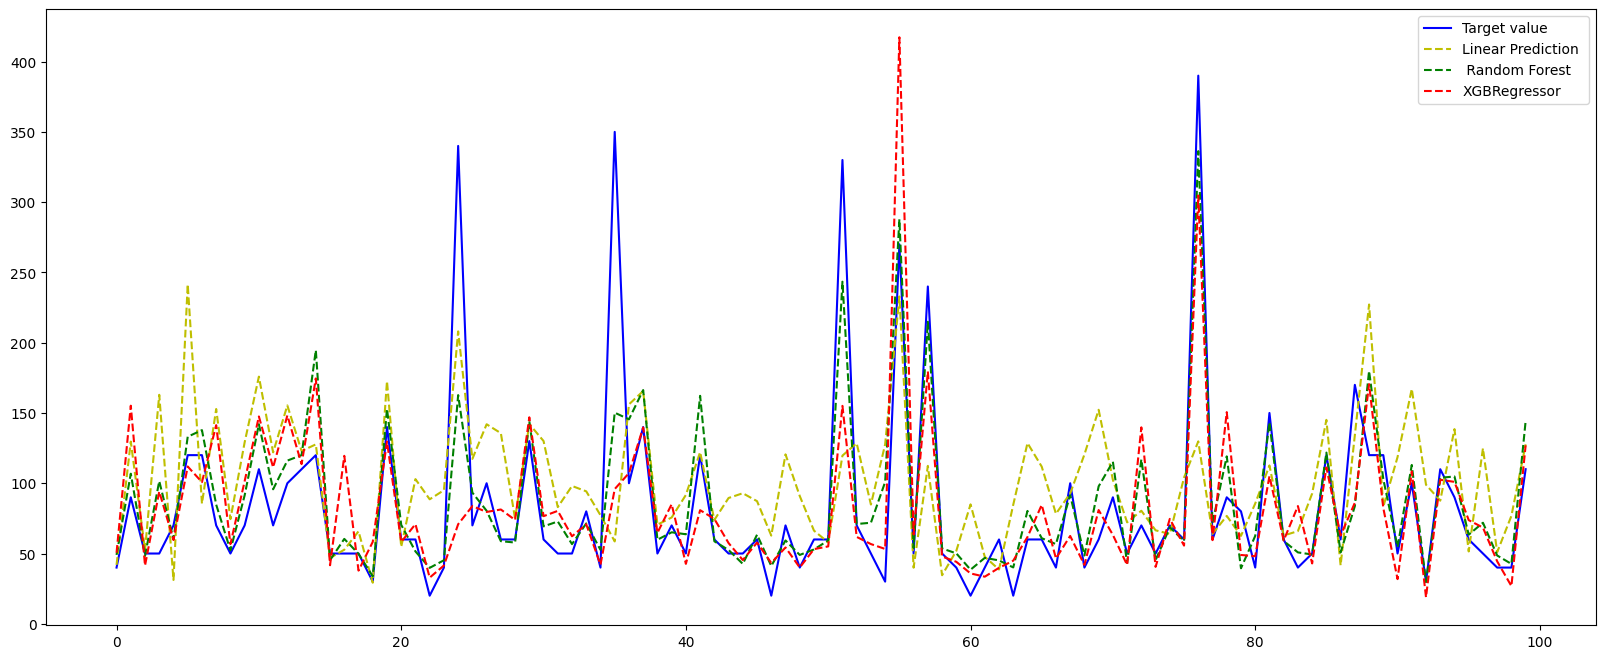

In [ ]:
# Save the File
fig = plt.figure(figsize=(20,8))
plt.plot(y_test[:100].values,label='Target value',color='b')
plt.plot(y1_pred[:100],label='Linear Prediction ', linestyle='--', color='y')
plt.plot(y2_pred[:100],label=' Random Forest ', linestyle='--', color='g')
plt.plot(y3_pred[:100],label='XGBRegressor', linestyle='--', color='r')
plt.legend()
plt.show('jpg')

Based on the test accuracies, it appears that the "RFR_grid_search" (RandomForestRegressor with cross-validated grid search) model has the highest test accuracy of 0.550144. Therefore, considering the provided data, the "RFR_cv_grid" model might be chosen as the final prediction model due to its relatively better performance on unseen data compared to the other models in the list

##### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Model: Random Forest Regressor with GridSearchCV

The Random Forest Regressor is an ensemble learning algorithm that combines multiple decision trees to make predictions. Each decision tree in the ensemble is trained on a random subset of the data and a random subset of the features. The final prediction is the average (for regression) or majority vote (for classification) of the predictions made by each individual tree.

The GridSearchCV is a technique for hyperparameter tuning that exhaustively searches through a specified grid of hyperparameter values to find the combination that performs best according to a specified evaluation metric.

Feature Importance:

Feature importance is a metric that quantifies the contribution of each feature in the model's predictions. It helps us understand which features are most influential in driving the model's outcomes. In the context of a Random Forest model, the feature importance is calculated based on the decrease in impurity (typically measured using Gini impurity or mean decrease in variance) that each feature causes when used in the construction of decision trees.

## ***8.*** ***Future Work (Optional)***





### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Create and train the model
RFR_cv_grid = RandomForestRegressor()  # You might need to pass hyperparameters here
RFR_cv_grid.fit(X_train, y_train)

# Check model attributes (optional)
print("Number of trees:", RFR_cv_grid.n_estimators)
# Print other relevant attributes if needed

# Calculate and print R-squared scores
train_predictions = RFR_cv_grid.predict(X_train)
train_accuracy = r2_score(y_train, train_predictions)

test_predictions = RFR_cv_grid.predict(X_test)
test_accuracy = r2_score(y_test, test_predictions)

print('Train R-squared is', train_accuracy)
print('Test R-squared is', test_accuracy)

Number of trees: 100
Train R-squared is 0.937055486351734
Test R-squared is 0.5374856219918744


In [ ]:
import pickle

In [ ]:
# Save the File
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
with open("rf_model.pkl", "rb") as f:
    unpickled_model = pickle.load(f)

In [ ]:
unpickled_model.score(X_train, y_train)

0.9351685434478116

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In conclusion, the "Random Forest Regressor with GridSearchCV" model appears to be the best-performing model based on testing accuracy. However, given the high training accuracy, it's important to further investigate potential overfitting issues and consider strategies to mitigate them, such as hyperparameter tuning and feature selection. Additionally, the cross-validated XGBoost model also provides strong results and might be worth considering due to its good balance between bias and variance.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***